In [4]:
import cv2 as cv2
import numpy as np
from matplotlib import pyplot as pyplot


In [5]:
imgCol = cv2.imread('../Utils/LenaJPEG.jpg')
cv2.imshow('Lenna',imgCol)

imgGame = cv2.imread('../Utils/SetWellen.png')
cv2.imshow('SetWellen',imgGame)

cv2.waitKey(0)
cv2.destroyAllWindows

#resize hier

<function destroyAllWindows>

In [30]:
imgGray = cv2.imread('/content/drive/My Drive/BV1/Lenna2.png', cv2.IMREAD_GRAYSCALE)
cv2_imshow(imgGray)

imgGameGray = cv2.imread('/content/drive/My Drive/BV1/SetWellen.png', cv2.IMREAD_GRAYSCALE)
cv2_imshow(imgGameGray)

Output hidden; open in https://colab.research.google.com to view.

In [4]:
bit_depth = imgGray.dtype
print('Bit-Tiefe des Bildes: ', bit_depth)

Bit-Tiefe des Bildes:  uint8


In [5]:
def histogram(img):
    height, width = img.shape

    L = pow(2, 8)
    arr = np.zeros(L)
    
    for y in range(height):
        for x in range(width):
            tmp = img[y][x]
            arr[tmp] = arr[tmp] + 1

    return arr

def normHistogram(histo):
    normHist = np.zeros(256)
    height, width = imgGray.shape
    size = height * width


    for i in range(len(normHist)):
        normHist[i] = histo[i]/size
    return normHist

<function matplotlib.pyplot.show(close=None, block=None)>

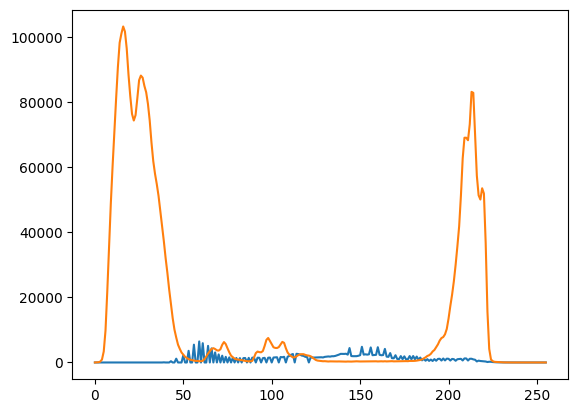

In [31]:
histogram1 = histogram(imgGray)
pyplot.plot(histogram1)
pyplot.show
histGame = histogram(imgGameGray)   #Histogram Game Set
pyplot.plot(histGame)
pyplot.show

#pyplot.plot(normHistogram(histogram1))
#pyplot.show

In [32]:
def cumHistogram(histo):
    cumHisto = np.zeros(256)
    for i in range(len(histo)):
        if i == 0:
            cumHisto[i] = histo[i]
        else:
            cumHisto[i] = cumHisto[i-1] + histo[i]
    return cumHisto

<function matplotlib.pyplot.show(close=None, block=None)>

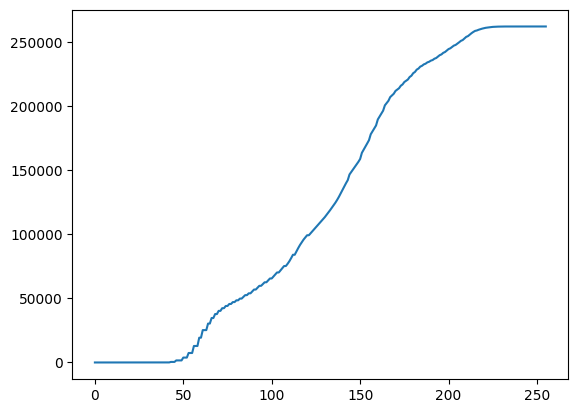

In [9]:
cumHisto = cumHistogram(histogram1)
pyplot.plot(cumHisto)
pyplot.show

In [10]:
def conStretching(img):
    #Bestimme die Schwellwerte
    p1 = np.percentile(img, 1)
    p99 = np.percentile(img, 99)

    t0 = int(p1)
    t1 = int(p99)
    
    min_val = np.min(img[img>=t0])
    max_val = np.max(img[img<=t1])
    
    out = ((img - min_val) * (255.0 / (t1 - t0))).clip(0, 255).astype(np.uint8)

    return out


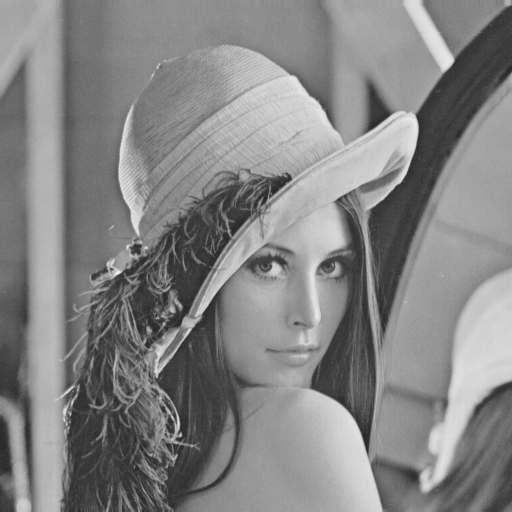

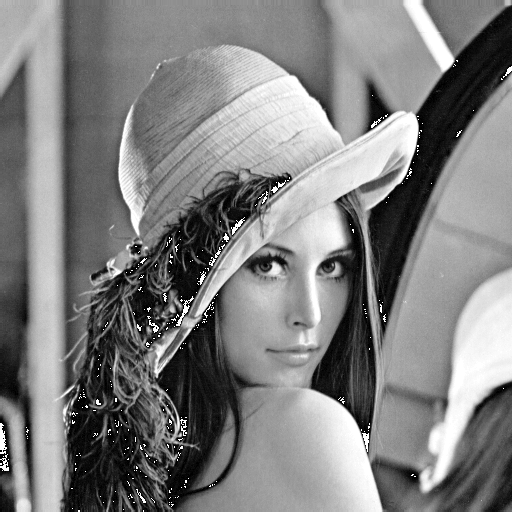

In [11]:
newImg = conStretching(imgGray)
cv2_imshow(imgGray)
cv2_imshow(newImg)

In [13]:
def calculate_median(hist):       #Medianberechnung
    cumHist = cumHistogram(hist)

    median_gray = np.searchsorted(cumHist, cumHist[-1] / 2)

    return median_gray

<function matplotlib.pyplot.show(close=None, block=None)>

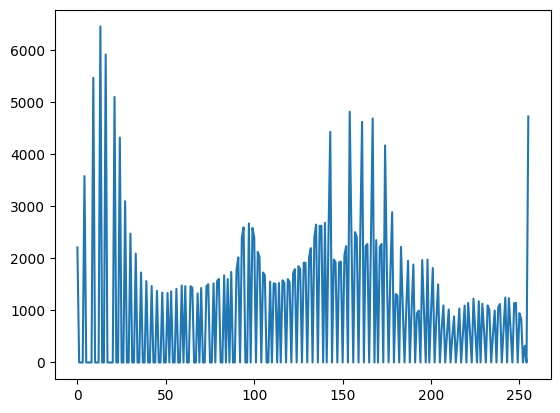

In [14]:
#calculate_median(cumHisto)
histogram2 = histogram(newImg)    #histogram
pyplot.plot(histogram2)
pyplot.show

<function matplotlib.pyplot.show(close=None, block=None)>

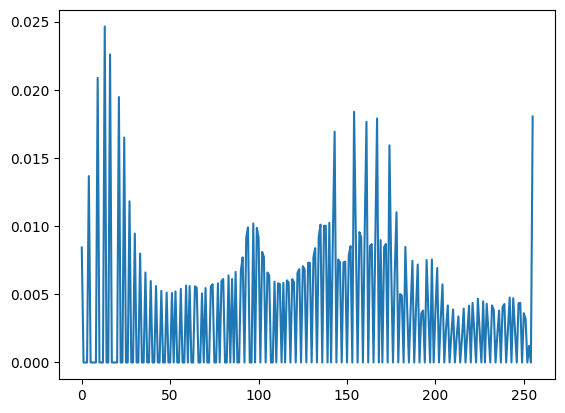

In [15]:
normHistogram2 = normHistogram(histogram2)
pyplot.plot(normHistogram2)
pyplot.show

<function matplotlib.pyplot.show(close=None, block=None)>

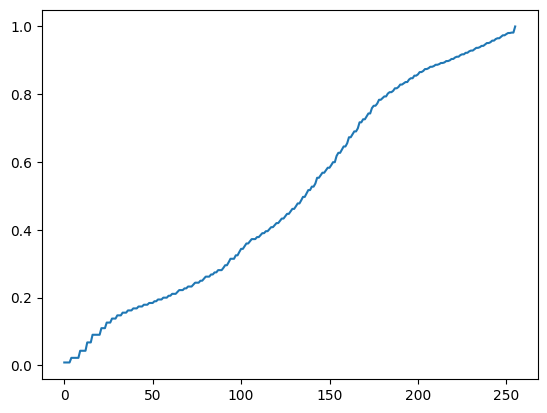

In [16]:
cumHisto2 = cumHistogram(normHistogram2)
pyplot.plot(cumHisto2)
pyplot.show

In [17]:
calculate_median(normHistogram2)

137

<function matplotlib.pyplot.show(close=None, block=None)>

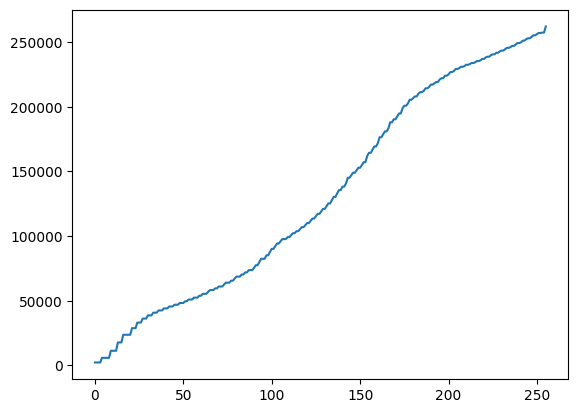

In [18]:
cumHisto3 = cumHistogram(histogram2)
pyplot.plot(cumHisto3)
pyplot.show

In [19]:
medianGray = calculate_median(histogram2)
print(medianGray)

137


In [51]:
def conBinary(img, threshold):
    width, height = img.shape
    result = np.zeros((width, height))

    for y in range(height):
        for x in range(width):
            if img[x, y] < threshold:
                result[x, y] = 0
            else:
                result[x,y] = 255
    
    print(result)
    return result

In [ ]:
conBinary(newImg, medianGray)

[[255. 255. 255. ... 255. 255.   0.]
 [255. 255. 255. ... 255. 255.   0.]
 [255. 255. 255. ... 255. 255.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


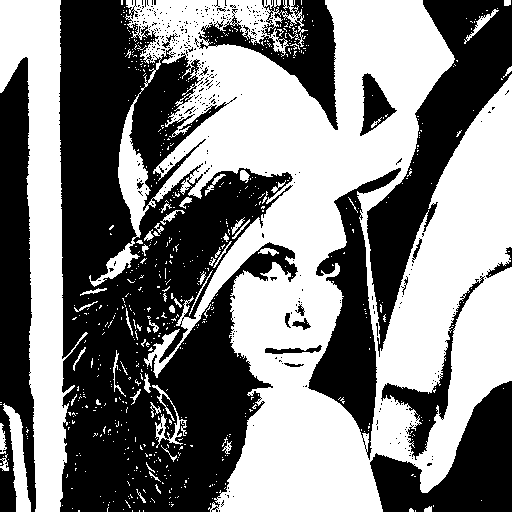

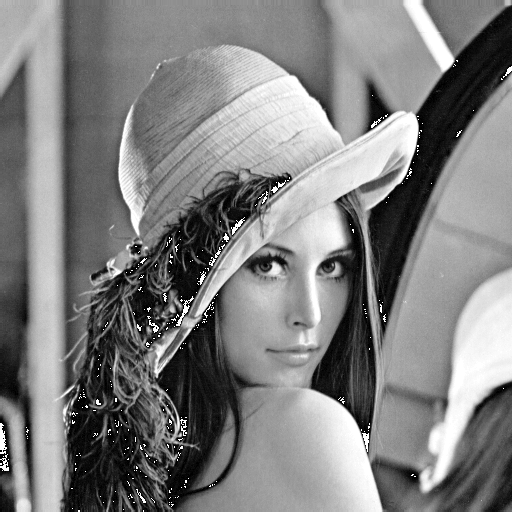

In [49]:
binaryGray = conBinary(newImg, medianGray)
cv2_imshow(binaryGray)
cv2_imshow(newImg)

In [38]:
#Aufgabe 1 Übung 3
def otsu (histogram, image):
    
    height, width = image.shape
    size = height * width
    hSum = 0
    for i in range(0, len(histogram)-1):
        hSum = hSum + i * histogram[i]


    t = -1
    varMax = -1
    c0 = 0
    sum0 = 0

    for i in range(0, len(histogram)-1):
        c0 = c0 + histogram[i]
        c1 = size - c0
        sum0 = sum0 + i * histogram[i]
        mean0 = sum0/c0
        mean1 = (hSum - sum0)/c1
        varBetween = c0 * c1 * (mean0 - mean1)**2

        if(varMax < varBetween):
            varMax = varBetween
            t = i
        
    
    return t

<ipython-input-38-b0ffc9a974f1>:21: RuntimeWarning: invalid value encountered in double_scalars
  mean1 = (hSum - sum0)/c1


118
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


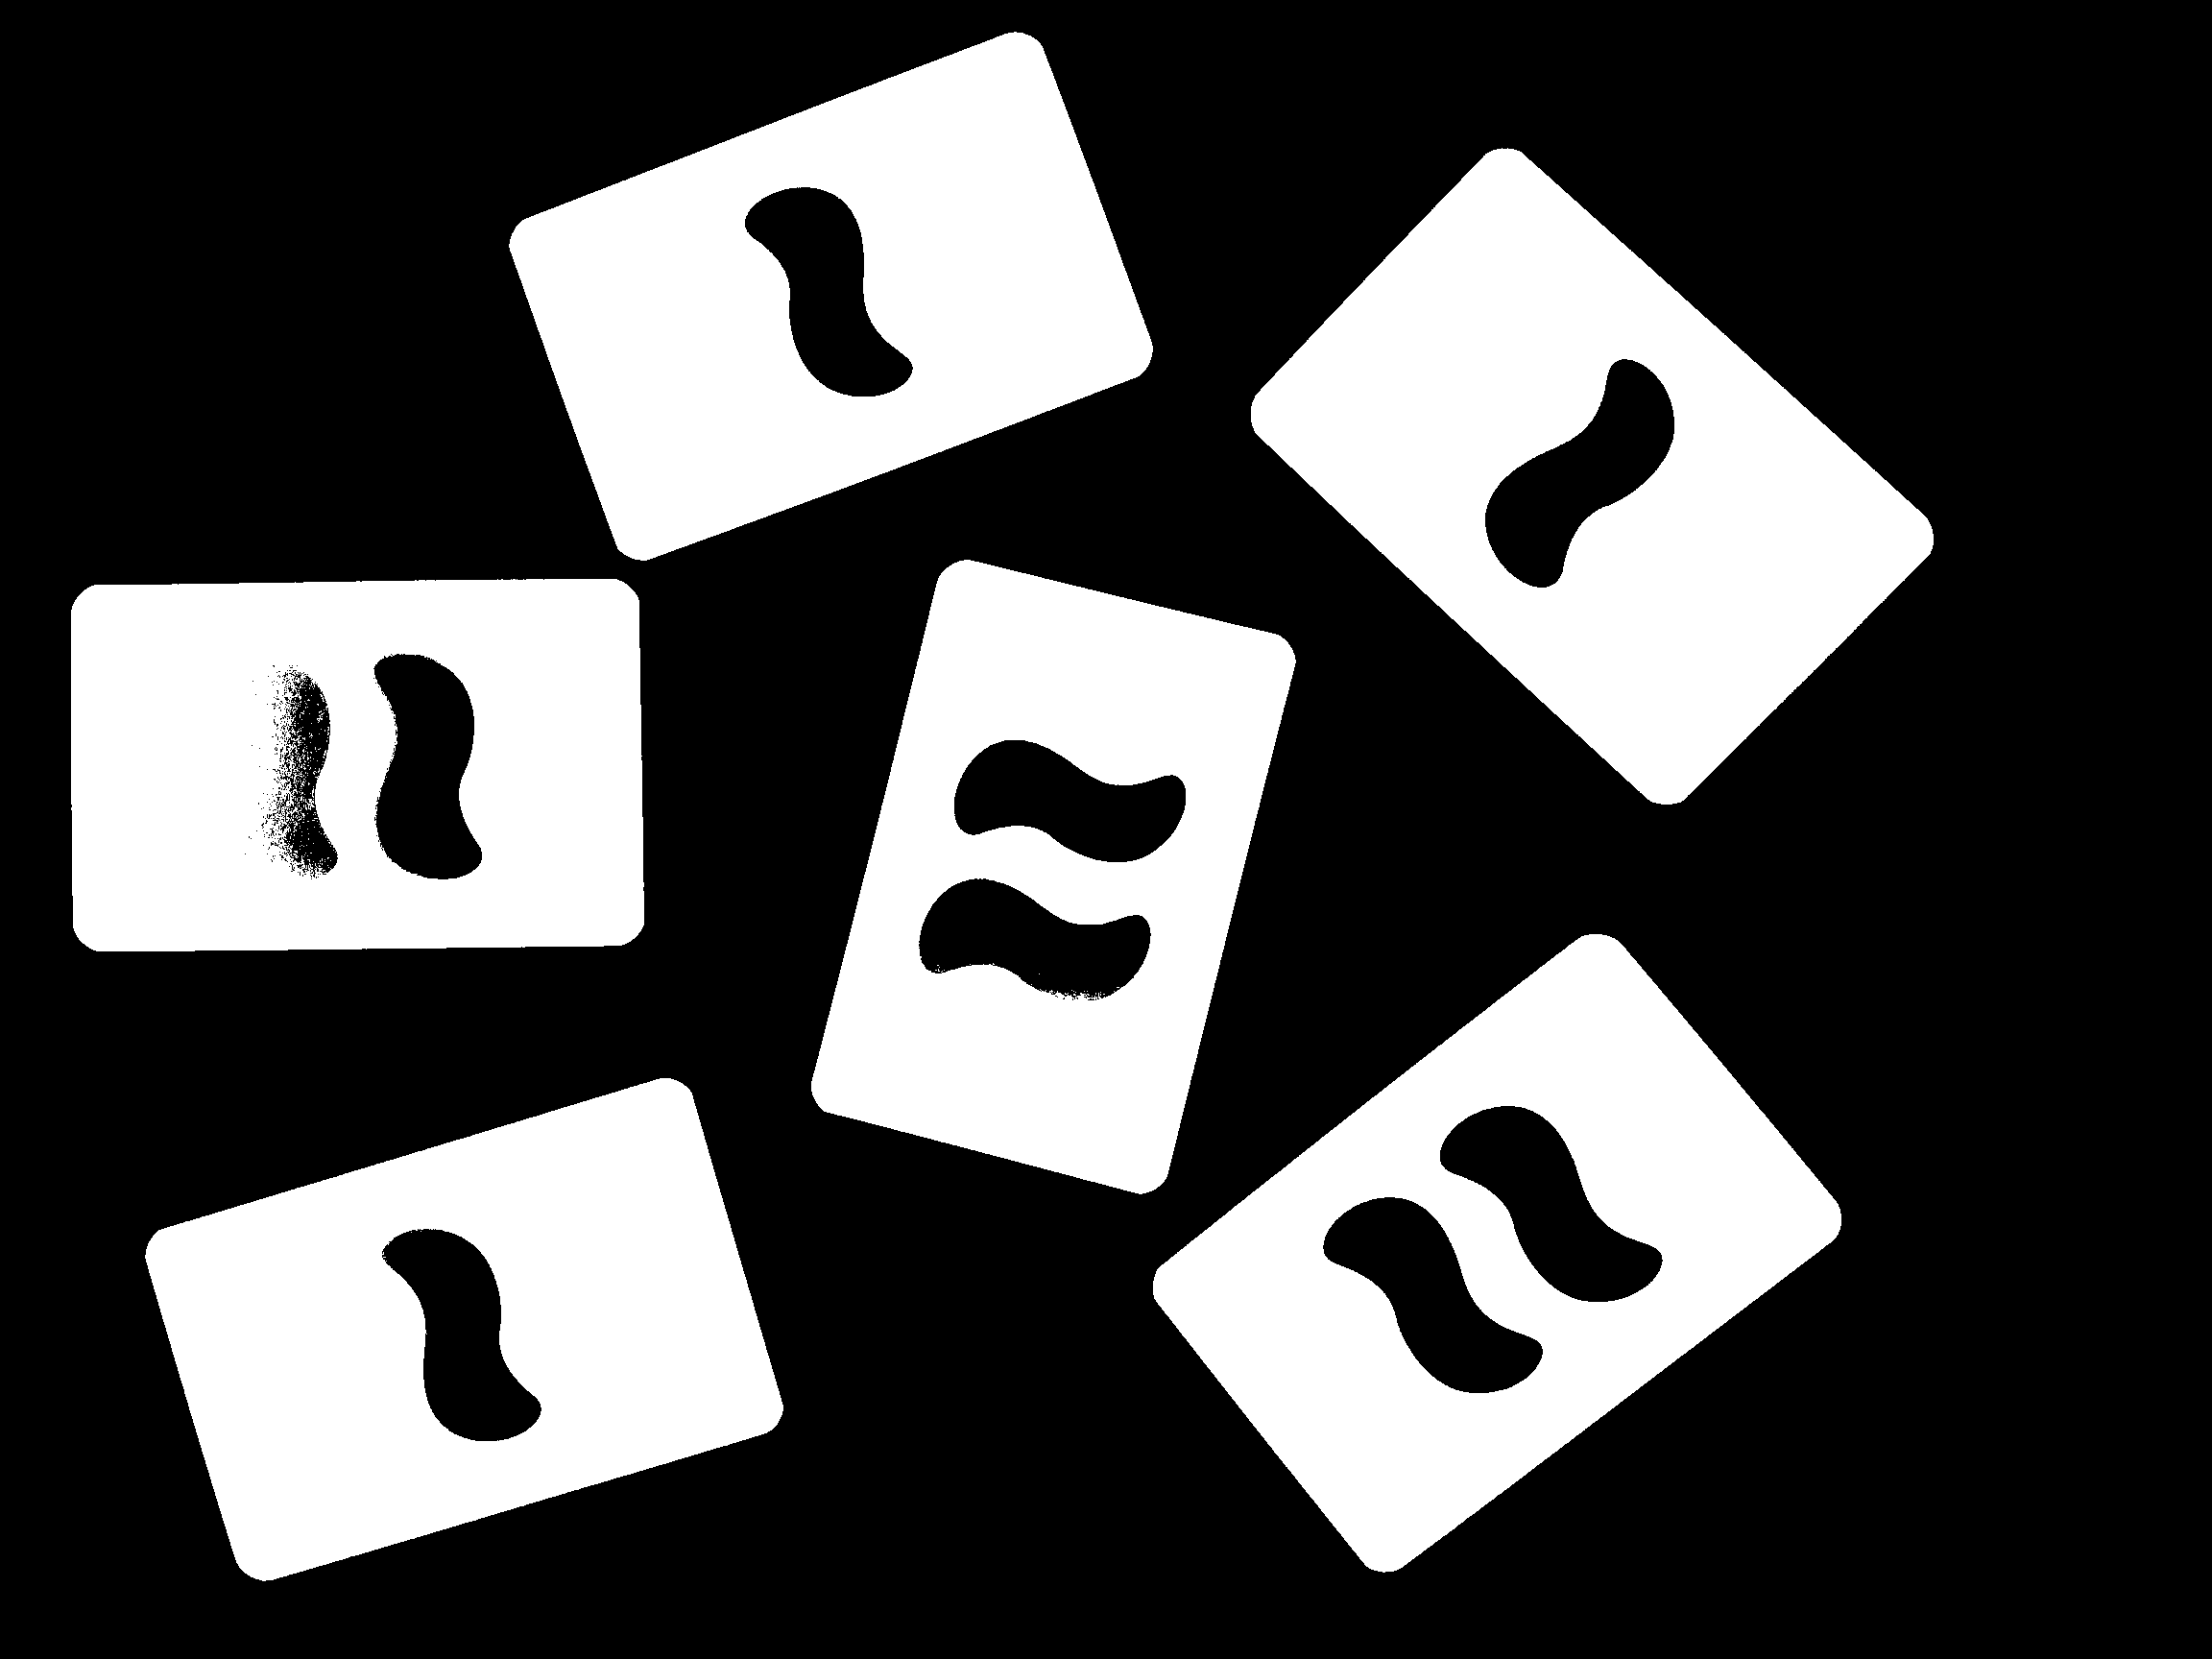

In [52]:
t_Otsu = otsu(histGame, imgGameGray)
print(t_Otsu)
binaryGameImg = conBinary(imgGameGray, t_Otsu)
cv2_imshow(binaryGameImg)